<a href="https://colab.research.google.com/github/NuttakitDW/DeepWork_216/blob/master/Preproceessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
#Import original file from github
cc = pd.read_csv('https://raw.githubusercontent.com/NuttakitDW/DeepWork_216/master/cc.csv')
dmg = pd.read_csv('https://raw.githubusercontent.com/NuttakitDW/DeepWork_216/master/demographics.csv')
kplus = pd.read_csv('https://raw.githubusercontent.com/NuttakitDW/DeepWork_216/master/kplus.csv')
train = pd.read_csv('https://raw.githubusercontent.com/NuttakitDW/DeepWork_216/master/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/NuttakitDW/DeepWork_216/master/test.csv')

In [5]:
cc.isna().sum()

cc_no         0
pos_dt        0
cc_txn_amt    0
dtype: int64

In [6]:
dmg.isna().sum()
#NaN is here find the way to deal with it.
#We can use One Hot Encoder.

id         0
cc_no      0
gender     0
ocp_cd    26
age        0
dtype: int64

In [7]:
kplus.isna().sum()

id              0
sunday          0
kp_txn_count    0
kp_txn_amt      0
dtype: int64

In [8]:
train.isna().sum()

id        0
income    0
dtype: int64

In [9]:
test.isna().sum()

id    0
dtype: int64

In [10]:
dmg[dmg['ocp_cd'].isna()]

,id,cc_no,gender,ocp_cd,age
10543,5344,5510,1,NaN,3
10544,5344,19230,1,NaN,3
10545,5344,47370,1,NaN,3
10546,5344,58117,1,NaN,3
10547,5344,61765,1,NaN,3
11233,5694,5876,1,NaN,2
43778,23233,26421,2,NaN,3
43779,23233,92381,2,NaN,3
49415,26505,30740,1,NaN,3
49416,26505,95746,1,NaN,3


In [11]:
#Find the way to improve cc dataset.
#We have cc_no but not id we have to merge this with dmg dataset.
#We have pos_dt with Year, Month, and Date but Year and Date doesn't matter.
#Create columns that contain spend amount seperate by month.
cc.head()

,cc_no,pos_dt,cc_txn_amt
0,37069,2018-05-10,5000
1,37069,2018-06-04,12000
2,37069,2018-04-03,5000
3,37069,2018-04-22,1600
4,37069,2018-01-21,5000


In [12]:
#create new columns that contain date format for only month.
cc_new = cc.copy() 
cc_new['month'] = pd.DatetimeIndex(cc['pos_dt']).month
cc_new.head()

,cc_no,pos_dt,cc_txn_amt,month
0,37069,2018-05-10,5000,5
1,37069,2018-06-04,12000,6
2,37069,2018-04-03,5000,4
3,37069,2018-04-22,1600,4
4,37069,2018-01-21,5000,1


In [13]:
cc_new['cc_count'] = 1
cc_new.head() #try to find insight about used number of cc

,cc_no,pos_dt,cc_txn_amt,month,cc_count
0,37069,2018-05-10,5000,5,1
1,37069,2018-06-04,12000,6,1
2,37069,2018-04-03,5000,4,1
3,37069,2018-04-22,1600,4,1
4,37069,2018-01-21,5000,1,1


In [14]:
#group cell by cc_no & month for sum cc_txn_amt & cc_count on every month.
cc_g = cc_new.copy()
cc_g = cc_new.groupby(['cc_no', 'month'])['cc_txn_amt', 'cc_count'].sum().reset_index() 
cc_g.head()	

,cc_no,month,cc_txn_amt,cc_count
0,2,3,4600,2
1,2,4,18700,2
2,2,5,1600,2
3,2,6,2000,2
4,4,5,300000,12


In [15]:
#pivot cc_txn_amt value in month's column to row
cc_pivot_amt = cc_g.pivot_table('cc_txn_amt', 'cc_no', 'month').fillna(0) #replace NaN with 0
cc_pivot_amt.head()

month,1,2,3,4,5,6
cc_no,,,,,,
2,0.0,0.0,4600.0,18700.0,1600.0,2000.0
4,0.0,0.0,0.0,0.0,300000.0,240000.0
5,7000.0,5000.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,32000.0
7,900.0,2300.0,2200.0,1200.0,2800.0,6800.0


In [16]:
#pivot value in month's column to row
cc_pivot_cnt = cc_g.pivot_table('cc_count', 'cc_no', 'month').fillna(0) #replace NaN with 0
cc_pivot_cnt.head()

month,1,2,3,4,5,6
cc_no,,,,,,
2,0.0,0.0,2.0,2.0,2.0,2.0
4,0.0,0.0,0.0,0.0,12.0,11.0
5,2.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,3.0
7,1.0,2.0,2.0,1.0,3.0,2.0


In [17]:
#create new data frame that contain mean and sum of count and expense of cc.
cc_full = cc_pivot_cnt.drop([1,2,3,4,5,6], axis=1)
cc_full.head()

month
cc_no
2
4
5
6
7


In [18]:
cc_full['cc_mean'] = cc_pivot_amt.mean(axis=1)
cc_full['cc_sum'] = cc_pivot_amt.sum(axis=1)
cc_full['cc_cnt_mean'] = cc_pivot_cnt.mean(axis=1)
cc_full['cc_cnt_sum'] = cc_pivot_cnt.sum(axis=1)
cc_full.head()

month,cc_mean,cc_sum,cc_cnt_mean,cc_cnt_sum
cc_no,,,,
2,4483.333333,26900.0,1.333333,8.0
4,90000.000000,540000.0,3.833333,23.0
5,2000.000000,12000.0,0.500000,3.0
6,5333.333333,32000.0,0.500000,3.0
7,2700.000000,16200.0,1.833333,11.0


In [19]:
#reset index 
#index could make we feel confused when we merge this with other dataframe.
cc_full = cc_full.reset_index() #we still have month as a index but never mind it's dosen't matter.
cc_full.head()

month,cc_no,cc_mean,cc_sum,cc_cnt_mean,cc_cnt_sum
0,2,4483.333333,26900.0,1.333333,8.0
1,4,90000.000000,540000.0,3.833333,23.0
2,5,2000.000000,12000.0,0.500000,3.0
3,6,5333.333333,32000.0,0.500000,3.0
4,7,2700.000000,16200.0,1.833333,11.0


In [20]:
cc_final = cc_full.copy()
cc_final.head()
#we have cc_final as a standardized dataframe.

month,cc_no,cc_mean,cc_sum,cc_cnt_mean,cc_cnt_sum
0,2,4483.333333,26900.0,1.333333,8.0
1,4,90000.000000,540000.0,3.833333,23.0
2,5,2000.000000,12000.0,0.500000,3.0
3,6,5333.333333,32000.0,0.500000,3.0
4,7,2700.000000,16200.0,1.833333,11.0


In [21]:
#to standardize kplus dataframe.
#same as cc dataframe
#create new column that contain only month 
kplus.head()

,id,sunday,kp_txn_count,kp_txn_amt
0,14802,2018-01-14,2,2400
1,14802,2018-04-01,9,33900
2,14802,2018-05-27,7,6100
3,14802,2018-01-28,3,8500
4,14802,2018-03-25,2,4000


In [22]:
#create new columns that contain date format for only month.
kplus_new = kplus.copy() 
kplus_new['month'] = pd.DatetimeIndex(kplus['sunday']).month
kplus_new.head()

,id,sunday,kp_txn_count,kp_txn_amt,month
0,14802,2018-01-14,2,2400,1
1,14802,2018-04-01,9,33900,4
2,14802,2018-05-27,7,6100,5
3,14802,2018-01-28,3,8500,1
4,14802,2018-03-25,2,4000,3


In [23]:
#pivot  kp_txn_amt value in month's column to row
kplus_amt = kplus_new.pivot_table('kp_txn_amt', 'id', 'month').fillna(0) #replace NaN with 0
kplus_amt.head()

month,1,2,3,4,5,6
id,,,,,,
1,0.0,0.0,0.000000,0.0,0.0,1750.000000
2,1850.0,4900.0,5875.000000,12680.0,6225.0,17800.000000
3,3950.0,7350.0,6733.333333,12475.0,4100.0,5675.000000
4,264175.0,214750.0,178825.000000,261100.0,182250.0,352650.000000
6,0.0,0.0,0.000000,0.0,0.0,4466.666667


In [24]:
#pivot kp_txn_count value in month's column to row
kplus_cnt = kplus_new.pivot_table('kp_txn_count', 'id', 'month').fillna(0) #replace NaN with 0
kplus_cnt.head()

month,1,2,3,4,5,6
id,,,,,,
1,0.00,0.00,0.000000,0.00,0.00,1.000000
2,3.25,3.75,3.500000,5.40,4.75,4.000000
3,2.75,4.00,3.333333,3.25,3.75,3.250000
4,11.75,15.00,12.000000,10.80,13.00,13.500000
6,0.00,0.00,0.000000,0.00,0.00,3.333333


In [25]:
#create new data frame that contain mean & sum of cnt & amt
kplus_full = kplus_cnt.copy()
kplus_full = kplus_full.drop([1,2,3,4,5,6], axis=1)
kplus_full.head()

month
id
1
2
3
4
6


In [26]:
kplus_full['kp_mean'] = kplus_amt.mean(axis=1)
kplus_full['kp_sum'] = kplus_amt.sum(axis=1)
kplus_full['kp_cnt_mean'] = kplus_cnt.mean(axis=1)
kplus_full['kp_cnt_sum'] = kplus_cnt.sum(axis=1)
kplus_full.head()

month,kp_mean,kp_sum,kp_cnt_mean,kp_cnt_sum
id,,,,
1,291.666667,1.750000e+03,0.166667,1.000000
2,8221.666667,4.933000e+04,4.108333,24.650000
3,6713.888889,4.028333e+04,3.388889,20.333333
4,242291.666667,1.453750e+06,12.675000,76.050000
6,744.444444,4.466667e+03,0.555556,3.333333


In [27]:
kplus_final = kplus_full.copy()
kplus_final = kplus_final.reset_index()
kplus_final.head()

month,id,kp_mean,kp_sum,kp_cnt_mean,kp_cnt_sum
0,1,291.666667,1.750000e+03,0.166667,1.000000
1,2,8221.666667,4.933000e+04,4.108333,24.650000
2,3,6713.888889,4.028333e+04,3.388889,20.333333
3,4,242291.666667,1.453750e+06,12.675000,76.050000
4,6,744.444444,4.466667e+03,0.555556,3.333333


In [28]:
#create new dataframe to contain all of value to create model.
main = dmg.copy()
main.head()

,id,cc_no,gender,ocp_cd,age
0,1,1,2,9.0,5
1,1,98397,2,9.0,5
2,2,2,2,3.0,4
3,2,9740,2,3.0,4
4,3,3,2,1.0,3


In [29]:
#merge main with cc_final
main = dmg.merge(cc_final, how='left', on='cc_no').fillna(0)
main.head()

,id,cc_no,gender,ocp_cd,age,cc_mean,cc_sum,cc_cnt_mean,cc_cnt_sum
0,1,1,2,9.0,5,0.000000,0.0,0.000000,0.0
1,1,98397,2,9.0,5,7450.000000,44700.0,0.833333,5.0
2,2,2,2,3.0,4,4483.333333,26900.0,1.333333,8.0
3,2,9740,2,3.0,4,6383.333333,38300.0,5.666667,34.0
4,3,3,2,1.0,3,0.000000,0.0,0.000000,0.0


In [30]:
main.isna().sum() #why ocp_cd doesn't have any NaN value?

id             0
cc_no          0
gender         0
ocp_cd         0
age            0
cc_mean        0
cc_sum         0
cc_cnt_mean    0
cc_cnt_sum     0
dtype: int64

In [31]:
dmg.isna().sum() #but dmg have

id         0
cc_no      0
gender     0
ocp_cd    26
age        0
dtype: int64

In [32]:
main[dmg['ocp_cd'].isna()]
#that is horible mistake we need to fix it by return these 0 value to 999

,id,cc_no,gender,ocp_cd,age,cc_mean,cc_sum,cc_cnt_mean,cc_cnt_sum
10543,5344,5510,1,0.0,3,0.000000,0.0,0.000000,0.0
10544,5344,19230,1,0.0,3,500.000000,3000.0,0.500000,3.0
10545,5344,47370,1,0.0,3,11266.666667,67600.0,0.666667,4.0
10546,5344,58117,1,0.0,3,0.000000,0.0,0.000000,0.0
10547,5344,61765,1,0.0,3,10483.333333,62900.0,1.500000,9.0
11233,5694,5876,1,0.0,2,183.333333,1100.0,0.666667,4.0
43778,23233,26421,2,0.0,3,800.000000,4800.0,0.166667,1.0
43779,23233,92381,2,0.0,3,0.000000,0.0,0.000000,0.0
49415,26505,30740,1,0.0,3,81900.000000,491400.0,35.166667,211.0
49416,26505,95746,1,0.0,3,24433.333333,146600.0,11.833333,71.0


In [33]:
na_index = main[dmg['ocp_cd'].isna()].index #selected row
main_ocp = main.copy()
main_ocp.at[na_index, 'ocp_cd'] = 999
main_ocp[dmg['ocp_cd'].isna()]

,id,cc_no,gender,ocp_cd,age,cc_mean,cc_sum,cc_cnt_mean,cc_cnt_sum
10543,5344,5510,1,999.0,3,0.000000,0.0,0.000000,0.0
10544,5344,19230,1,999.0,3,500.000000,3000.0,0.500000,3.0
10545,5344,47370,1,999.0,3,11266.666667,67600.0,0.666667,4.0
10546,5344,58117,1,999.0,3,0.000000,0.0,0.000000,0.0
10547,5344,61765,1,999.0,3,10483.333333,62900.0,1.500000,9.0
11233,5694,5876,1,999.0,2,183.333333,1100.0,0.666667,4.0
43778,23233,26421,2,999.0,3,800.000000,4800.0,0.166667,1.0
43779,23233,92381,2,999.0,3,0.000000,0.0,0.000000,0.0
49415,26505,30740,1,999.0,3,81900.000000,491400.0,35.166667,211.0
49416,26505,95746,1,999.0,3,24433.333333,146600.0,11.833333,71.0


In [34]:
# cc_no dosen't matter now
#dc = drop cc_no
main_dc = main_ocp.copy()
main_dc = main_dc.drop('cc_no', axis=1) #drop it
main_dc.head()

,id,gender,ocp_cd,age,cc_mean,cc_sum,cc_cnt_mean,cc_cnt_sum
0,1,2,9.0,5,0.000000,0.0,0.000000,0.0
1,1,2,9.0,5,7450.000000,44700.0,0.833333,5.0
2,2,2,3.0,4,4483.333333,26900.0,1.333333,8.0
3,2,2,3.0,4,6383.333333,38300.0,5.666667,34.0
4,3,2,1.0,3,0.000000,0.0,0.000000,0.0


In [35]:
#main_c mean main with cc information
main_c = main_dc.copy()
main_c = main_dc.groupby(['id', 'gender', 'ocp_cd', 'age'])['cc_sum', 'cc_mean', 'cc_cnt_sum', 'cc_cnt_mean'].sum().reset_index()
main_c.head()

,id,gender,ocp_cd,age,cc_sum,cc_mean,cc_cnt_sum,cc_cnt_mean
0,1,2,9.0,5,44700.0,7450.000000,5.0,0.833333
1,2,2,3.0,4,65200.0,10866.666667,42.0,7.000000
2,3,2,1.0,3,0.0,0.000000,0.0,0.000000
3,4,2,3.0,5,770000.0,128333.333333,36.0,6.000000
4,5,2,9.0,4,12000.0,2000.000000,3.0,0.500000


In [36]:
# merge main_g with kplus
# main_ck mean cc and kplus
main_ck = main_c.merge(kplus_final, how='left', on='id').fillna(0) #fill NaN with 0
main_ck.head()

,id,gender,ocp_cd,age,cc_sum,cc_mean,cc_cnt_sum,cc_cnt_mean,kp_mean,kp_sum,kp_cnt_mean,kp_cnt_sum
0,1,2,9.0,5,44700.0,7450.000000,5.0,0.833333,291.666667,1.750000e+03,0.166667,1.000000
1,2,2,3.0,4,65200.0,10866.666667,42.0,7.000000,8221.666667,4.933000e+04,4.108333,24.650000
2,3,2,1.0,3,0.0,0.000000,0.0,0.000000,6713.888889,4.028333e+04,3.388889,20.333333
3,4,2,3.0,5,770000.0,128333.333333,36.0,6.000000,242291.666667,1.453750e+06,12.675000,76.050000
4,5,2,9.0,4,12000.0,2000.000000,3.0,0.500000,0.000000,0.000000e+00,0.000000,0.000000


In [39]:
main_ck.isna().sum()

id             0
gender         0
ocp_cd         0
age            0
cc_sum         0
cc_mean        0
cc_cnt_sum     0
cc_cnt_mean    0
kp_mean        0
kp_sum         0
kp_cnt_mean    0
kp_cnt_sum     0
dtype: int64

In [40]:
#overall column
main_ov = main_ck.copy()
main_ov['overall'] = main_ov['cc_sum'] + main_ov['kp_sum']
main_ov.head()


,id,gender,ocp_cd,age,cc_sum,cc_mean,cc_cnt_sum,cc_cnt_mean,kp_mean,kp_sum,kp_cnt_mean,kp_cnt_sum,overall
0,1,2,9.0,5,44700.0,7450.000000,5.0,0.833333,291.666667,1.750000e+03,0.166667,1.000000,4.645000e+04
1,2,2,3.0,4,65200.0,10866.666667,42.0,7.000000,8221.666667,4.933000e+04,4.108333,24.650000,1.145300e+05
2,3,2,1.0,3,0.0,0.000000,0.0,0.000000,6713.888889,4.028333e+04,3.388889,20.333333,4.028333e+04
3,4,2,3.0,5,770000.0,128333.333333,36.0,6.000000,242291.666667,1.453750e+06,12.675000,76.050000,2.223750e+06
4,5,2,9.0,4,12000.0,2000.000000,3.0,0.500000,0.000000,0.000000e+00,0.000000,0.000000,1.200000e+04


In [58]:
#return 999 in ocp_cd colunms to NaN
nine_index = main_ov[main_ov['ocp_cd'] == 999].index #selected row
main_nine = main_ov.copy()
main_nine.at[nine_index, 'ocp_cd'] = None
main_nine[main_ov['ocp_cd'] == 999]
#we will fix it by using One Hot Encoder

,id,gender,ocp_cd,age,cc_sum,cc_mean,cc_cnt_sum,cc_cnt_mean,kp_mean,kp_sum,kp_cnt_mean,kp_cnt_sum,overall
5343,5344,1,NaN,3,133500.0,22250.000000,16.0,2.666667,20281.111111,1.216867e+05,4.272222,25.633333,2.551867e+05
5693,5694,1,NaN,2,1100.0,183.333333,4.0,0.666667,20764.166667,1.245850e+05,7.958333,47.750000,1.256850e+05
23232,23233,2,NaN,3,4800.0,800.000000,1.0,0.166667,24346.666667,1.460800e+05,3.566667,21.400000,1.508800e+05
26504,26505,1,NaN,3,638000.0,106333.333333,282.0,47.000000,23122.500000,1.387350e+05,4.983333,29.900000,7.767350e+05
30597,30598,2,NaN,3,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
31876,31877,1,NaN,5,315100.0,52516.666667,24.0,4.000000,266838.055556,1.601028e+06,6.030556,36.183333,1.916128e+06
32574,32575,1,NaN,3,80800.0,13466.666667,76.0,12.666667,29277.500000,1.756650e+05,2.583333,15.500000,2.564650e+05
36097,36098,2,NaN,3,75700.0,12616.666667,41.0,6.833333,6612.500000,3.967500e+04,1.833333,11.000000,1.153750e+05
39538,39539,2,NaN,3,16300.0,2716.666667,14.0,2.333333,47674.722222,2.860483e+05,4.911111,29.466667,3.023483e+05
43382,43383,1,NaN,3,40500.0,6750.000000,28.0,4.666667,7850.000000,4.710000e+04,2.111111,12.666667,8.760000e+04


In [0]:
#we done with main dataframe which is using for training model
main_final = main_nine.copy()

In [61]:
#Split main_final to train_data and test_data
train_data = main_final[:50000]
train_data.tail()


,id,gender,ocp_cd,age,cc_sum,cc_mean,cc_cnt_sum,cc_cnt_mean,kp_mean,kp_sum,kp_cnt_mean,kp_cnt_sum,overall
49995,49996,2,3.0,4,7900.0,1316.666667,5.0,0.833333,7394.444444,44366.666667,3.111111,18.666667,52266.666667
49996,49997,1,9.0,5,3900.0,650.000000,3.0,0.500000,28244.166667,169465.000000,9.825000,58.950000,173365.000000
49997,49998,2,9.0,2,15100.0,2516.666667,8.0,1.333333,15425.833333,92555.000000,7.275000,43.650000,107655.000000
49998,49999,2,3.0,3,11800.0,1966.666667,2.0,0.333333,7294.444444,43766.666667,1.333333,8.000000,55566.666667
49999,50000,1,9.0,5,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [62]:
test_data = main_final[50000:]
test_data.head()

,id,gender,ocp_cd,age,cc_sum,cc_mean,cc_cnt_sum,cc_cnt_mean,kp_mean,kp_sum,kp_cnt_mean,kp_cnt_sum,overall
50000,50001,1,9.0,3,31800.0,5300.000000,7.0,1.166667,3875.000000,23250.000000,1.652778,9.916667,55050.000000
50001,50002,1,9.0,4,5900.0,983.333333,2.0,0.333333,3785.833333,22715.000000,5.250000,31.500000,28615.000000
50002,50003,1,3.0,4,0.0,0.000000,0.0,0.000000,8437.500000,50625.000000,3.458333,20.750000,50625.000000
50003,50004,2,3.0,4,7200.0,1200.000000,9.0,1.500000,731.944444,4391.666667,1.444444,8.666667,11591.666667
50004,50005,1,3.0,4,14800.0,2466.666667,7.0,1.166667,8734.722222,52408.333333,2.958333,17.750000,67208.333333


In [63]:
#add income column to train_data
train_data['income'] = train['income']
train_data.head() 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,gender,ocp_cd,age,cc_sum,cc_mean,cc_cnt_sum,cc_cnt_mean,kp_mean,kp_sum,kp_cnt_mean,kp_cnt_sum,overall,income
0,1,2,9.0,5,44700.0,7450.000000,5.0,0.833333,291.666667,1.750000e+03,0.166667,1.000000,4.645000e+04,20000
1,2,2,3.0,4,65200.0,10866.666667,42.0,7.000000,8221.666667,4.933000e+04,4.108333,24.650000,1.145300e+05,106000
2,3,2,1.0,3,0.0,0.000000,0.0,0.000000,6713.888889,4.028333e+04,3.388889,20.333333,4.028333e+04,29000
3,4,2,3.0,5,770000.0,128333.333333,36.0,6.000000,242291.666667,1.453750e+06,12.675000,76.050000,2.223750e+06,61000
4,5,2,9.0,4,12000.0,2000.000000,3.0,0.500000,0.000000,0.000000e+00,0.000000,0.000000,1.200000e+04,18000


In [66]:
print(len(train), len(test))

50000 15000


In [67]:
#we got train_data for training model and test_data for answers
#train_data should have 50000 rows
#test_data should have 15000
print(len(train_data), len(test_data))

50000 15000


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


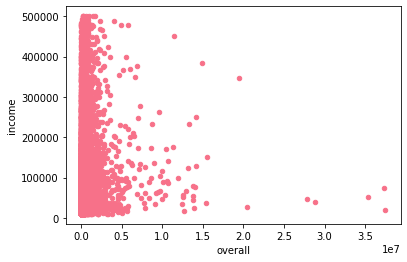

In [83]:
#we done with standadise process
#next we will remove outlier
train_data.plot.scatter(x='overall', y='income')

In [84]:
#remove outlier by remove data that have overall > 1e7 & income > 3e5
rem_out = train_data.copy() #rem_out = remove outlier
indexNames = rem_out[((train_data['income'] > 3e5) & (train_data['overall'] > 1e7))].index
rem_out.drop(indexNames , inplace=True)

indexNames2 = rem_out[train_data['overall'] > 2.5e7].index
rem_out.drop(indexNames2 , inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


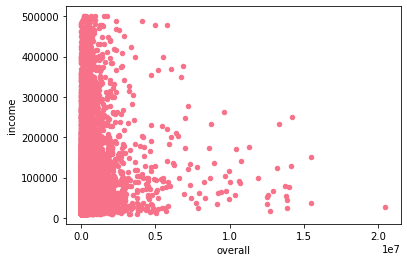

In [87]:
rem_out.plot.scatter(x='overall', y='income', )

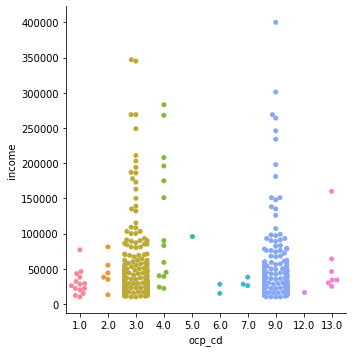

In [100]:
#check ocp_cd vs income
sns.catplot(x="ocp_cd", y="income", kind="swarm", data=rem_out.sample(500))

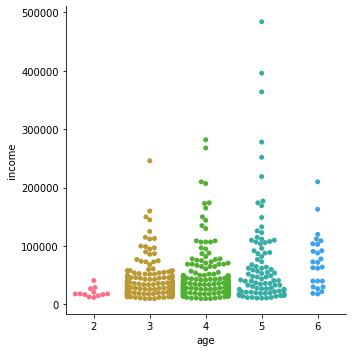

In [101]:
#check age vs income
sns.catplot(x="age", y="income", kind="swarm", data=rem_out.sample(500))

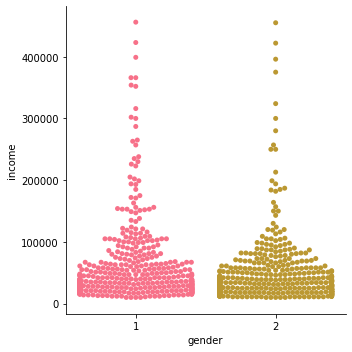

In [104]:
#check gender vs income
sns.catplot(x="gender", y="income", kind="swarm", data=rem_out.sample(1000))

In [0]:
#Done
train_final = rem_out.copy()
test_final = test_data.copy()